In [1]:
# Vector operations

import arcpy

arcpy.env.overwriteOutput = True

In [2]:
# Create a geodatabase that will hold my vector layers

output_folder = "C:/EsriTraining/"
output_gdb = "Vectors.gdb"

if not arcpy.Exists(output_folder + output_gdb):
    print("Creating", output_gdb)
    arcpy.CreateFileGDB_management(output_folder, output_gdb)
    
    

Creating Vectors.gdb


In [3]:
out_gdb = output_folder + output_gdb

In [4]:
# Create a polygon layer
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/create-feature-class.htm

out_name = "alpaca_region"
geometry = "POLYGON"

arcpy.management.CreateFeatureclass(out_gdb, out_name, geometry)

<Result 'C:\\EsriTraining\\Vectors.gdb\\alpaca_region'>

In [6]:
# Add a couple of fields
# https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/add-field.htm

# TEXT refers to String data type

arcpy.AddField_management(out_gdb + "/" + out_name, "Name", "TEXT", 255)

<Result 'C:/EsriTraining/Vectors.gdb/alpaca_region'>

In [7]:
# Add an integer field alpaca_count

arcpy.AddField_management(out_gdb + "/" + out_name, "alpaca_count", "LONG", 9)


<Result 'C:/EsriTraining/Vectors.gdb/alpaca_region'>

In [8]:
# Add a record, we have to define the geometry, and optionally add the 
# attribute information (which we will not do now) of the record

# First thing we need to do is to create an arcpy Array
# containing a list of arcpy points with coordinates

array = arcpy.Array([arcpy.Point(0,0),
                    arcpy.Point(1000,0),
                    arcpy.Point(1000,1000),
                    arcpy.Point(0,1000)])

# Convert arcpy Array into an arcpy Polygon
polygon = arcpy.Polygon(array)

# https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/insertcursor-class.htm
# In order to create new records, we use insert cursor

insert_cur = arcpy.da.InsertCursor(out_gdb + "/" + out_name, ['alpaca_count', 'Name', 'SHAPE@'])
insert_cur.insertRow([10, "Alpacas in the middle of nowhere", polygon])

# cursors take space in memory, so it is a good practice
# to delete them from memory once we are done with them
# otherwise they could hold the geodatabase in transaction mode

del insert_cur

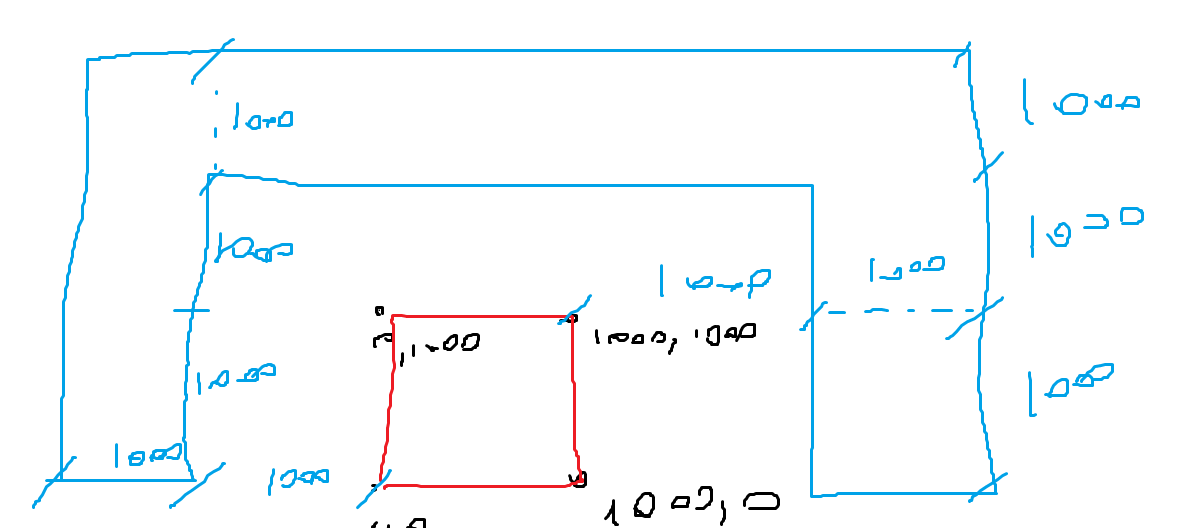

In [10]:
# Draw the reverse U shape

array = arcpy.Array([arcpy.Point(-2000,0),
                    arcpy.Point(-2000,3000),
                    arcpy.Point(3000,3000),
                    arcpy.Point(3000,0),
                    arcpy.Point(2000,0),
                    arcpy.Point(2000,2000),
                    arcpy.Point(-1000,2000),
                    arcpy.Point(-1000,0)])

# Convert arcpy Array into an arcpy Polygon
polygon = arcpy.Polygon(array)

# https://pro.arcgis.com/en/pro-app/latest/arcpy/data-access/insertcursor-class.htm
# In order to create new records, we use insert cursor

insert_cur = arcpy.da.InsertCursor(out_gdb + "/" + out_name, ['alpaca_count', 'Name', 'SHAPE@'])
insert_cur.insertRow([100, "A very big Alpaca farm", polygon])

# cursors take space in memory, so it is a good practice
# to delete them from memory once we are done with them

del insert_cur

In [11]:
# How to create a point layer and put an individual point inside it

arcpy.management.CreateFeatureclass(out_gdb, "alpaca_location", "POINT")

<Result 'C:\\EsriTraining\\Vectors.gdb\\alpaca_location'>

In [12]:
# InsertCursor to add points
insert_cursor = arcpy.da.InsertCursor(out_gdb + "/alpaca_location", ['SHAPE@'])

insert_cursor.insertRow([(500,500)])

del insert_cursor

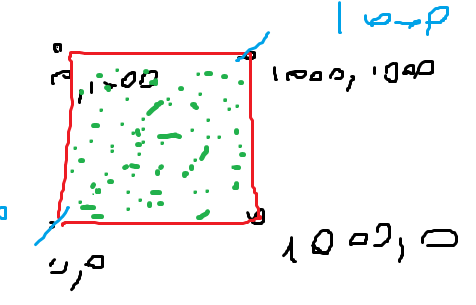

In [19]:
# Write a function that will take in the number of random points
# and place them in our original box

# create_random_points(1000)

# How to create a random number?

import random

random_number1 = random.uniform(0, 10)
random_number2 = random.uniform(0, 10)

print("Two random numbers", random_number1, random_number2)

Two random numbers 6.10790702794564 6.773128784834599


In [20]:
def createRandomPoints(no_points):
    insert_cursor = arcpy.da.InsertCursor(out_gdb + "/alpaca_location", ['SHAPE@'])
    for i in range(no_points):
        x = random.uniform(0, 1000)
        y = random.uniform(0, 1000)
        insert_cursor.insertRow([(x, y)])
    del insert_cursor
    
createRandomPoints(100)

In [23]:
print(random.gauss(0, 1))

-1.5163526392372177


In [24]:
# range between x:2000-3000
# y:0-1000
# central point: 2500, 500

def createGaussianRandomPoints(no_points):
    insert_cursor = arcpy.da.InsertCursor(out_gdb + "/alpaca_location", ['SHAPE@'])
    for i in range(no_points):
        x = random.gauss(0, 200) + 2500
        y = random.gauss(0, 200) + 500
        insert_cursor.insertRow([(x, y)])
    del insert_cursor
    
createGaussianRandomPoints(1000)

In [26]:
# how to delete features?
# We need to use update cursor

update_cur = arcpy.da.UpdateCursor(out_gdb + "/alpaca_location", ['SHAPE@X', 'SHAPE@Y'])
for row in update_cur:
    if(row[0]<2000 or row[0]>3000 or row[1] < 0 or row[1] > 1000):
        update_cur.deleteRow()
del update_cur

In [ ]:
# Create a function that will take in the # of random points,
# also the extents (in minimum x, minimum y, distance) of a square
# delete all the points that fall inside a hypotherical circle
# that is tangential to the extents box

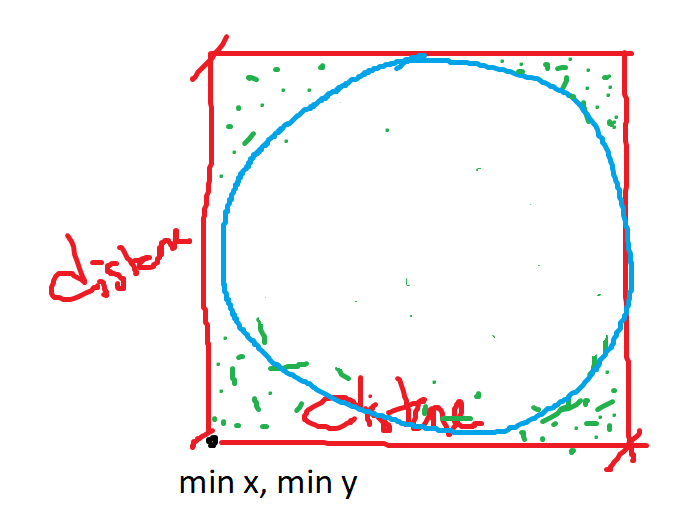

In [27]:
def randomPointsWithHole(no_points, minx, miny, distance):
    cenx = minx + distance / 2
    ceny = miny + distance / 2
    insert_cursor = arcpy.da.InsertCursor(out_gdb + "/alpaca_location", ['SHAPE@'])
    for i in range(no_points):
        x = random.uniform(minx, minx + distance)
        y = random.uniform(miny, miny + distance)
        insert_cursor.insertRow([(x, y)])
    del insert_cursor
    
    update_cur = arcpy.da.UpdateCursor(out_gdb + "/alpaca_location", ['SHAPE@X', 'SHAPE@Y'])
    for row in update_cur:
        if((row[0]- cenx)**2 + (row[1] - ceny)**2 < (distance/2)**2):
            update_cur.deleteRow()
    del update_cur

In [29]:
randomPointsWithHole(1000, -2000, 0, 1000)